In [2]:
!pip install pillow

In [3]:
from PIL import Image

In [5]:
import math
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

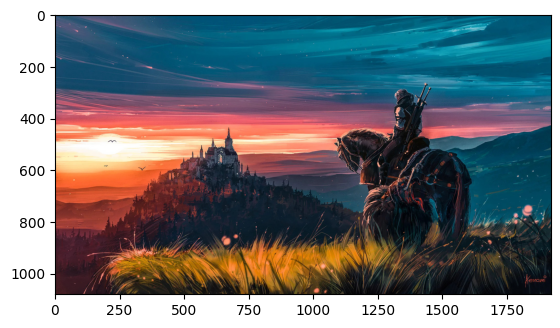

In [10]:
image = mpl.image.imread("landscape1.jpg")
plt.imshow(image)

In [11]:
image.shape

(1080, 1920, 3)

In [12]:
img = Image.open("landscape1.jpg")

In [21]:
j =img.load()

In [22]:
for i in range(1000):
    for jj in range(1000):
        print(j[i,jj])

(36, 80, 109)
(37, 81, 110)
(41, 85, 114)
(41, 84, 116)
(36, 80, 109)
(39, 83, 112)
(47, 91, 118)
(52, 96, 123)
(50, 86, 112)
(51, 87, 113)
(56, 87, 115)
(61, 91, 119)
(65, 92, 121)
(66, 93, 122)
(66, 91, 122)
(63, 90, 120)
(62, 87, 118)
(66, 91, 122)
(67, 92, 123)
(64, 87, 119)
(65, 85, 118)
(72, 88, 122)
(74, 88, 123)
(71, 84, 119)
(71, 87, 120)
(92, 98, 134)
(96, 91, 131)
(88, 81, 122)
(83, 85, 123)
(73, 86, 120)
(66, 85, 117)
(72, 91, 123)
(77, 92, 123)
(83, 89, 123)
(94, 92, 129)
(81, 81, 117)
(73, 84, 114)
(74, 94, 121)
(72, 87, 116)
(86, 95, 126)
(102, 92, 127)
(105, 87, 127)
(118, 95, 141)
(101, 90, 133)
(77, 85, 122)
(72, 92, 125)
(74, 91, 121)
(82, 91, 122)
(75, 88, 122)
(68, 83, 116)
(62, 83, 114)
(63, 88, 119)
(64, 91, 121)
(60, 89, 119)
(61, 90, 120)
(63, 92, 122)
(66, 93, 123)
(65, 92, 122)
(60, 89, 119)
(58, 87, 119)
(54, 87, 118)
(53, 88, 118)
(51, 90, 119)
(50, 91, 119)
(52, 94, 119)
(41, 85, 110)
(41, 83, 108)
(56, 89, 120)
(69, 93, 127)
(67, 89, 126)
(57, 87, 121)
(5

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



(255, 193, 158)
(254, 211, 176)
(254, 214, 178)
(250, 210, 174)
(250, 210, 174)
(255, 213, 178)
(255, 212, 177)
(255, 211, 176)
(255, 212, 175)
(255, 213, 176)
(255, 205, 170)
(243, 194, 154)
(249, 207, 169)
(253, 223, 185)
(255, 170, 141)
(233, 130, 95)
(245, 157, 121)
(252, 196, 161)
(252, 203, 162)
(253, 214, 175)
(242, 212, 176)
(255, 232, 196)
(254, 218, 182)
(244, 198, 162)
(252, 202, 165)
(251, 203, 167)
(254, 210, 171)
(255, 213, 176)
(255, 212, 175)
(255, 207, 171)
(252, 198, 162)
(254, 191, 158)
(255, 187, 154)
(248, 173, 141)
(253, 185, 150)
(248, 167, 137)
(249, 154, 126)
(255, 153, 128)
(255, 154, 129)
(253, 154, 125)
(255, 151, 124)
(255, 149, 123)
(255, 147, 118)
(255, 147, 118)
(254, 146, 117)
(254, 146, 118)
(255, 145, 118)
(254, 143, 116)
(255, 141, 115)
(253, 139, 113)
(254, 140, 113)
(255, 141, 114)
(254, 140, 113)
(254, 140, 113)
(254, 143, 115)
(255, 144, 117)
(254, 143, 116)
(255, 144, 117)
(255, 145, 121)
(254, 153, 125)
(255, 156, 127)
(251, 145, 119)
(252, 142

In [61]:
class K_means:

    def __init__(self,img_path,k=5):
        self.k = k
        self.img = Image.open(img_path)
        self.img_copy = self.img.copy()
        self.pixel_access = self.img.load()
        self.cluster_map = np.ones((self.img.width,self.img.height))
        self.centroids = self.random_centroids()
        self.running = True

    def random_centroids(self):
        centres = []
        for i in range(self.k):
            x = np.random.rand()*self.img.width
            y = np.random.rand()*self.img.height
            centres.append((x,y))
        self.centroids = centres
        return centres

    def get_dist(self,pt1,pt2):
        return math.sqrt((pt1[0]-pt2[0])**2 + (pt1[1]-pt2[1])**2 + (pt1[2]-pt2[2])**2)

    def train(self):
        clus_map = self.cluster_map

        for x in range(self.img.width):
            for y in range(self.img.height):
                dist = []
                for i in range(self.k):
                    # print(self.centroids[i])
                    cluster_pxl = self.img_copy.getpixel(self.centroids[i])
                    point_pxl = self.img_copy.getpixel((x,y))
                    distance = self.get_dist(cluster_pxl,point_pxl)
                    dist.append(distance)
                index = dist.index(min(dist)) + 1
                clus_map[x][y] = index
                self.pixel_access[(x,y)] = self.img_copy.getpixel(self.centroids[index -1])
        if (self.cluster_map == clus_map).all():
            self.running = False
        return clus_map    
    def new_means(self):
        cl_map = self.train()
        cl_indexes = np.unique(cl_map)
        new_centroids = []
        for i in cl_indexes:
            x_vals = y_vals = n = 0
            for x in range(self.img.width):
                for y in range(self.img.height):
                    if cl_map[x,y] == i:
                        x_vals += x
                        y_vals += y
                        n += 1
            new_centroids.append((x_vals/n, y_vals/n))
        self.centroids = new_centroids

    def cluster(self):
        while self.running == True:
            self.new_means()
            self.train()
                    
                    
                

    
            
        
        


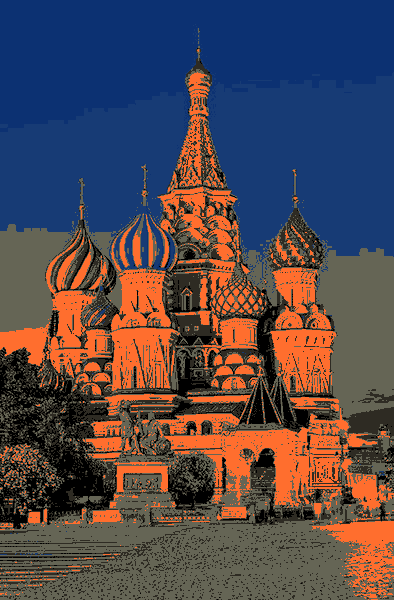

In [73]:
kk = K_means("1-Saint-Basils-Cathedral.webp",6)
kk.cluster()
kk.img

In [ ]:
kk.img_copy